In [1]:
# Import preliminaries
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('axes', edgecolor='lightgray')
plt.rc('ytick',labelsize=8)
plt.rc('xtick',labelsize=8)
plt.rc('legend',fontsize=8)
import itertools, os
from pathlib import Path

# bd CPS files
cps_dir = Path('/home/brian/Documents/CPS/data/clean/')

In [93]:
# Collect CPS data
cols = ['YEAR', 'MONTH', 'PWORWGT', 'HRSACTT', 'UNION', 'LFS', 'ABSTYPE', 'INDGRP']
    
df = pd.concat([pd.read_feather(cps_dir / f'cps{year}.ft', columns=cols)
                  .query('LFS == "Employed" and PWORWGT > 0 and MONTH == 9 and UNION in [0, 1]')
                 for year in [1998, 2009, 2015, 2020]])
df['IND'] = df['INDGRP']
df['IND'] = (df['IND'].str.replace('Leisure and hospitality', 'LHTTU')
                      .str.replace('Trade, transportation, and utilities', 'LHTTU'))

# Union-Job-adjusted weight
dates = ['YEAR']
dems = ['UNION']
wgt = 'PWORWGT'

p = df.groupby(dates + dems)[wgt].sum().rename('ADJ')
sh = (p / p.groupby(dates).sum()).dropna()
adj = (sh.loc[1998] / sh).reset_index()
data = (pd.merge(df, adj)
          .assign(ADJWGT = lambda x: x.ADJ * x[wgt]))

In [87]:
data

,YEAR,MONTH,PWORWGT,HRSACTT,UNION,LFS,ABSTYPE,INDGRP,IND,ADJ,ADJWGT
0,1998,9,10605.679688,32,0,Employed,Holiday,Finance and business services,Finance and business services,1.000000,10605.679688
1,1998,9,11912.382812,36,0,Employed,NaN,Finance and business services,Finance and business services,1.000000,11912.382812
2,1998,9,13180.021484,18,0,Employed,NaN,Finance and business services,Finance and business services,1.000000,13180.021484
3,1998,9,8762.027344,32,0,Employed,Holiday,Finance and business services,Finance and business services,1.000000,8762.027344
4,1998,9,10687.655273,32,0,Employed,Holiday,Finance and business services,Finance and business services,1.000000,10687.655273
...,...,...,...,...,...,...,...,...,...,...,...
51810,2020,9,15561.403320,40,1,Employed,NaN,Manufacturing,Manufacturing,2.630992,40941.929688
51811,2020,9,14002.993164,40,1,Employed,NaN,Manufacturing,Manufacturing,2.630992,36841.765625
51812,2020,9,15341.280273,32,1,Employed,Holiday,Manufacturing,Manufacturing,2.630992,40362.789062
51813,2020,9,17979.509766,32,1,Employed,Holiday,Manufacturing,Manufacturing,2.630992,47303.949219


In [88]:
adj

,UNION,IND,YEAR,ADJ
0,0,Construction and mining,1998,1.000000
1,0,Construction and mining,2009,0.900867
2,0,Construction and mining,2015,0.927118
3,0,Construction and mining,2020,0.864293
4,0,Education and health,1998,1.000000
5,0,Education and health,2009,0.831483
6,0,Education and health,2015,0.816922
7,0,Education and health,2020,0.760976
8,0,Finance and business services,1998,1.000000
9,0,Finance and business services,2009,0.900445


<AxesSubplot: xlabel='YEAR'>

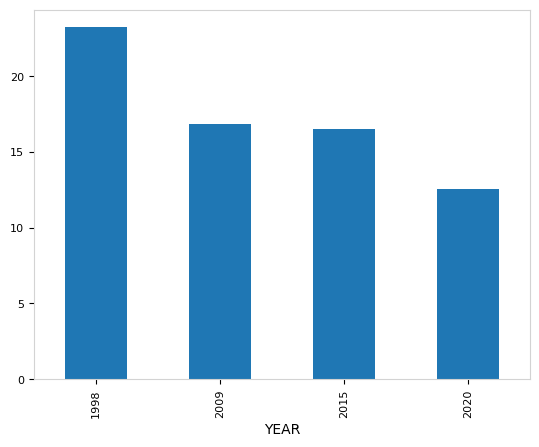

In [94]:
res = (data.groupby(['YEAR', 'ABSTYPE']).PWORWGT.sum() / 
       data.groupby('YEAR').PWORWGT.sum()).unstack()['Holiday'] * 100
res.plot(kind='bar')

<AxesSubplot: xlabel='YEAR'>

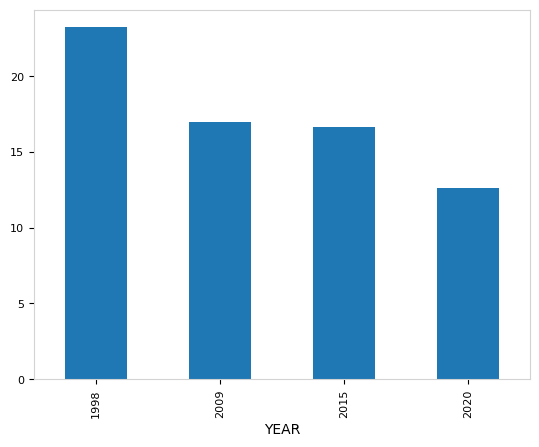

In [95]:
res1 = (data.groupby(['YEAR', 'ABSTYPE']).ADJWGT.sum() / 
       data.groupby('YEAR').ADJWGT.sum()).unstack()['Holiday'] * 100
res1.plot(kind='bar')

<AxesSubplot: xlabel='YEAR'>

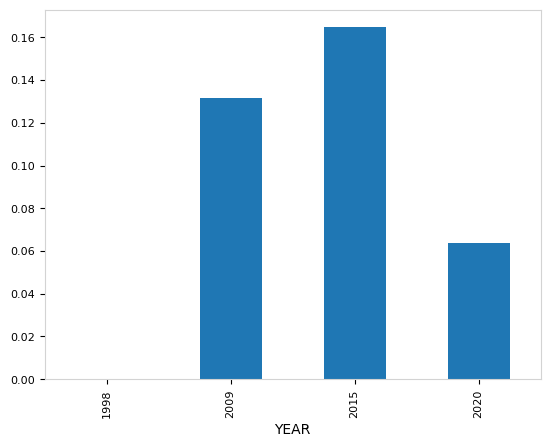

In [96]:
(res1 - res).plot(kind='bar')

In [ ]:
# Union-Job-adjusted weight
dates = ['YEAR']
dems = ['UNION', 'IND']
wgt = 'PWORWGT'

p = df.groupby(dates + dems)[wgt].sum().rename('ADJ')
sh = (p / p.groupby(dates).sum()).dropna()
adj = (sh.iloc[0] / sh).reset_index()
data = (pd.merge(df, adj)
          .assign(ADJWGT = lambda x: x.ADJ * x[wgt]))

In [36]:
df = pd.concat([pd.read_feather(cps_dir / f'cps{year}.ft', columns=cols)
                  .query('LFS == "Employed"')
                 for year in range(1994, 2024)])

# Date from Year, Month
df['DATE'] = pd.to_datetime(dict(year=df.YEAR, 
                                 month=df.MONTH, day=1))

<AxesSubplot: xlabel='DATE'>

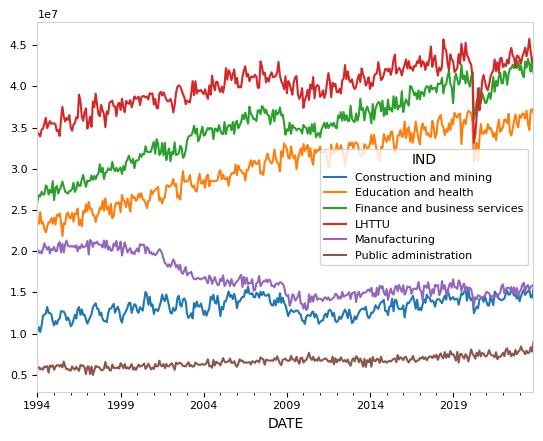

In [45]:
df.groupby(['DATE', 'IND']).PWORWGT.sum().unstack().plot()

In [40]:
df['IND'] = df['INDGRP']

In [44]:
df['IND'] = (df['IND'].str.replace('Leisure and hospitality', 'LHTTU')
                      .str.replace('Trade, transportation, and utilities', 'LHTTU'))

In [14]:
un = df.groupby(['YEAR', 'UNIONMEM']).PWORWGT.sum().unstack()

In [28]:
unrate = un.divide(un.sum(axis=1), axis=0)
#unrate / unrate.iloc[0]

In [31]:
unrate

UNIONMEM,0,1
YEAR,,
1998,0.855483,0.144517
2009,0.879007,0.120993
2015,0.892995,0.107005
2020,0.887641,0.112359


In [ ]:
# Collect CPS data
cols = ['YEAR', 'MONTH', 'BASICWGT', 'PWSSWGT', 'WORKFT', 'HRSACT1', 
        'HRSACTT', 'HRSUSL1', 'HRSUSLT', 'HRSUSL1I', 'LFS', 'AGE', 
        'EDUC', 'FEMALE', 'COW1', 'INDGRP', 'FORBORN', 'MJH', 'PTREASON',
        'FTLF', 'PTECON', 'ABSTYPE', 'WANTFT']

# Worker category
wcat = lambda x: (np.where(x['COW1'].isin(['Federal Government', 'State Government', 'Local Government']), 
                           'Employed, Public Sector',
                  np.where(x['COW1'].isin(['Self-employed Unincorporated', 'Self-employed Incorporated']), 
                           'Self-Employed', 'Employed, Private Sector')))

# Impute hours for people whose hours vary
hrsimp = lambda x: np.where(x['HRSUSL1'] == -4, x['HRSUSL1I'], x['HRSUSL1'])
    
df = pd.concat([pd.read_feather(cps_dir / f'cps{year}.ft', columns=cols)
                  .query('AGE > 15 and LFS == "Employed"')
                  .assign(WCAT = wcat, HRSIMP = hrsimp)
                 for year in range(1994, 2024)])

In [18]:
unrate = (un[1] / (un[1] + un[0]))

In [19]:
unrate / unrate.iloc[0]

YEAR
1998    1.000000
2009    0.837221
2015    0.740429
2020    0.777477
dtype: float32